<h3>Description</h3>

<b>This notebook demonstrates the feature selection process and a comparative analysis to evaluate model performance for each feature selection</b>

<b>This notebook is made according to the next instructions:</b>

1. Feature Selection based measurement:
- divide the data to train, validation, and test sets
- train a RF model with basic hyperparameters (max_depth = 4, trees = 100) on the train set
- fit explainability method (each one separately).
- for each explainability method (SHAP, LIME, Permutation, etc.) one should extract the global explanation in the form of "feature impact" (aggregation of all local feature impact).
- apply absolute value on the global explanation results to get the feature importance for each XAI method.
- sort the list to have the order of the least to the most important features.
- start an iterative process of eliminating the least important feature in each iteration and store the evaluation on the train, validation, and test sets (train will be store for reporting) - for classification store accuracy, precision, recall, auc. regression - MSE, MAE
- programmatically chose the best set of features based on a chosen evaluation metric (accuracy/ precision/ MSE...). you can do that by applying argmax operation. iteration here = number of features to eliminate.
- visualization: 
* each line represents the test score w.r.t each evaluation metric in each iteration. 
* the arg max is the displayed red vertical line in the following figure.
* print the final score- this is the score over the test set.
- after applying the process for each XAI method you should display the test score side by side

<h3>Libraries import</h3>

In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

In [2]:
from sklearn.ensemble import RandomForestClassifier

from xai_compare.comparison import FeatureElimination 
from xai_compare.config import MODE
from xai_compare.datasets import german_credit


<h3>Feature selection demonstration</h3>

In [3]:
# define the model
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# create the FeatureElimination class with german_credit() dataset
feat_elimination = FeatureElimination(model, *german_credit(), mode=MODE.CLASSIFICATION, random_state=4, verbose=True)

Explainers:   0%|          | 0/3 [00:00<?, ?it/s]


 SHAP explanation created
Iteration: 1, Removed: Duration in Current address

 SHAP explanation created
Iteration: 2, Removed: Length of current employment

 SHAP explanation created
Iteration: 3, Removed: Most valuable available asset

 SHAP explanation created
Iteration: 4, Removed: Guarantors

 SHAP explanation created
Iteration: 5, Removed: Instalment per cent

 SHAP explanation created
Iteration: 6, Removed: Occupation

 SHAP explanation created
Iteration: 7, Removed: Telephone

 SHAP explanation created
Iteration: 8, Removed: Foreign Worker

 SHAP explanation created
Iteration: 9, Removed: Value Savings/Stocks

 SHAP explanation created
Iteration: 10, Removed: No of dependents

 SHAP explanation created
Iteration: 11, Removed: No of Credits at this Bank

 SHAP explanation created
Iteration: 12, Removed: Sex & Marital Status

 SHAP explanation created
Iteration: 13, Removed: Type of apartment

 SHAP explanation created
Iteration: 14, Removed: Payment Status of Previous Credit

 S

Explainers:  33%|███▎      | 1/3 [00:07<00:15,  7.89s/it]


 SHAP explanation created
Iteration: 16, Removed: Duration of Credit (month)

 LIME explanation created
Iteration: 1, Removed: Concurrent Credits

 LIME explanation created
Iteration: 2, Removed: Purpose

 LIME explanation created
Iteration: 3, Removed: Most valuable available asset

 LIME explanation created
Iteration: 4, Removed: Credit Amount

 LIME explanation created
Iteration: 5, Removed: No of dependents

 LIME explanation created
Iteration: 6, Removed: Duration in Current address

 LIME explanation created
Iteration: 7, Removed: Sex & Marital Status

 LIME explanation created
Iteration: 8, Removed: No of Credits at this Bank

 LIME explanation created
Iteration: 9, Removed: Age (years)

 LIME explanation created
Iteration: 10, Removed: Telephone

 LIME explanation created
Iteration: 11, Removed: Instalment per cent

 LIME explanation created
Iteration: 12, Removed: Duration of Credit (month)

 LIME explanation created
Iteration: 13, Removed: Length of current employment

 LIME

Explainers:  67%|██████▋   | 2/3 [01:46<01:01, 61.04s/it]


 LIME explanation created
Iteration: 16, Removed: Type of apartment

 permutations explanation created
Iteration: 1, Removed: Telephone

 permutations explanation created
Iteration: 2, Removed: No of dependents

 permutations explanation created
Iteration: 3, Removed: Foreign Worker

 permutations explanation created
Iteration: 4, Removed: No of Credits at this Bank

 permutations explanation created
Iteration: 5, Removed: Guarantors

 permutations explanation created
Iteration: 6, Removed: Type of apartment

 permutations explanation created
Iteration: 7, Removed: Duration in Current address

 permutations explanation created
Iteration: 8, Removed: Occupation

 permutations explanation created
Iteration: 9, Removed: Most valuable available asset

 permutations explanation created
Iteration: 10, Removed: Sex & Marital Status

 permutations explanation created
Iteration: 11, Removed: Age (years)

 permutations explanation created
Iteration: 12, Removed: Instalment per cent

 permutatio

Explainers: 100%|██████████| 3/3 [02:00<00:00, 40.17s/it]


 permutations explanation created
Iteration: 16, Removed: Credit Amount
SHAP


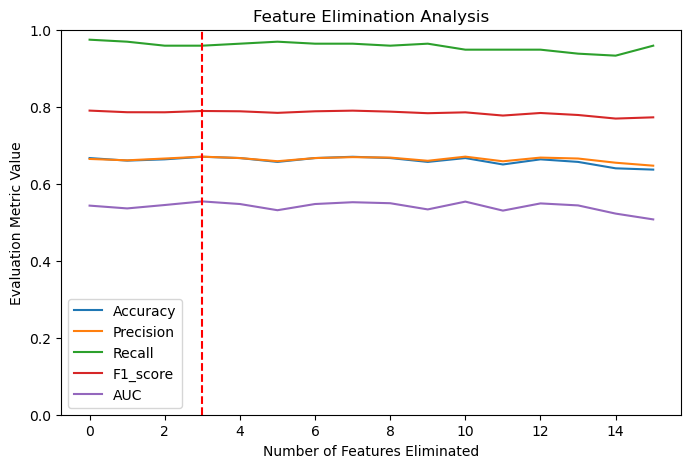

3 features are suggested to be removed
              train       val      test
Accuracy   0.830000  0.670000  0.730000
Precision  0.810384  0.670290  0.748663
Recall     0.997222  0.958549  0.952381
F1_score   0.894147  0.788913  0.838323
AUC        0.698611  0.554041  0.532794

LIME


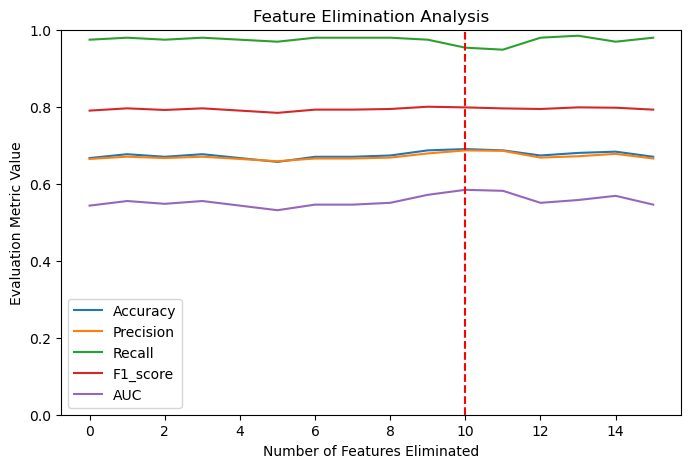

10 features are suggested to be removed
              train       val      test
Accuracy   0.802000  0.690000  0.745000
Precision  0.789357  0.686567  0.760870
Recall     0.988889  0.953368  0.952381
F1_score   0.877928  0.798265  0.845921
AUC        0.655159  0.584161  0.561096

PERMUTATIONS


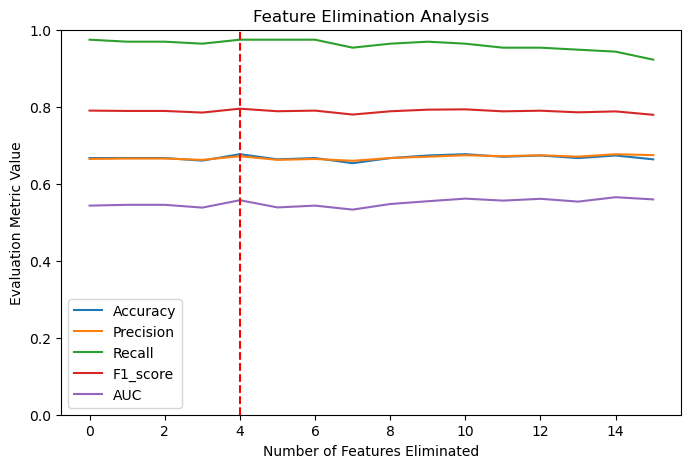

4 features are suggested to be removed
              train       val      test
Accuracy   0.824000  0.676667  0.730000
Precision  0.803571  0.671429  0.751351
Recall     1.000000  0.974093  0.945578
F1_score   0.891089  0.794926  0.837349
AUC        0.685714  0.557140  0.538827



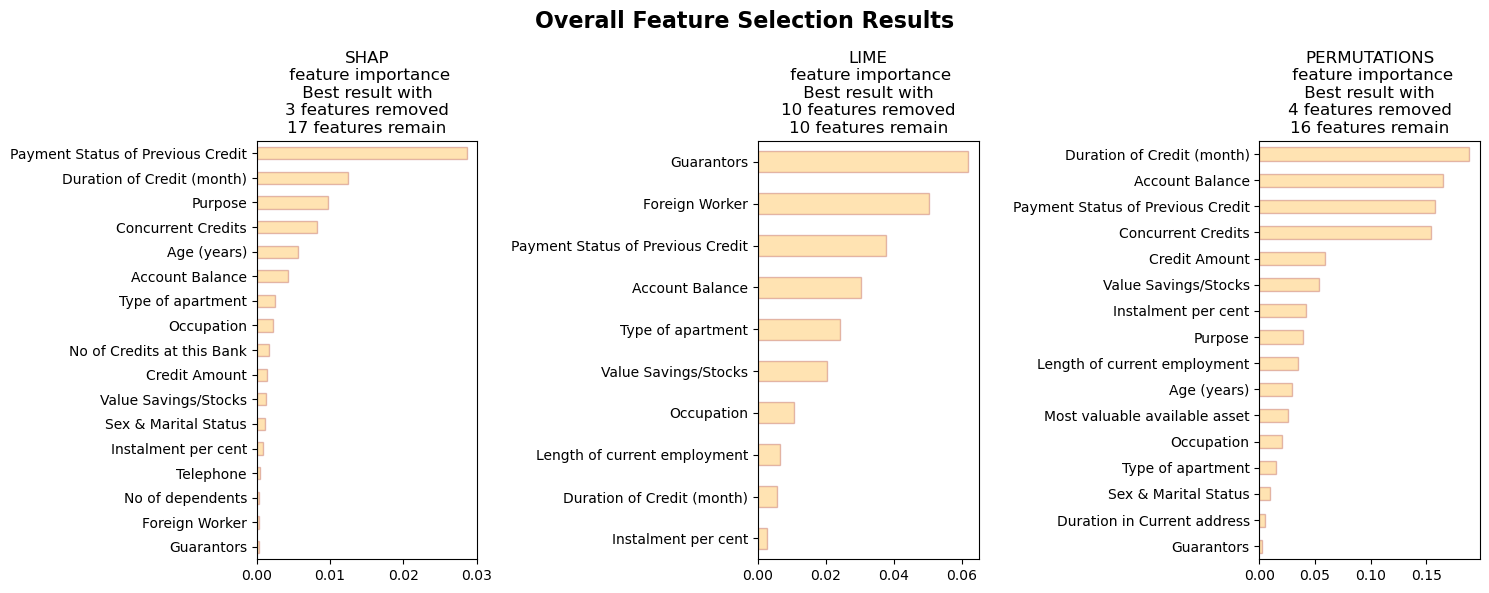

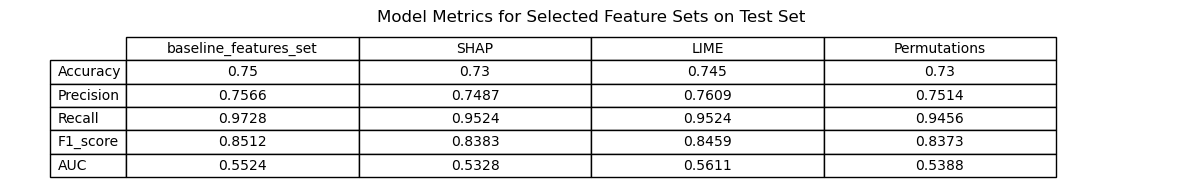

In [4]:
feat_elimination.apply()
feat_elimination.display()